# 911 Calls Dataset Exploration

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

In [259]:
import pandas as pd
import numpy as np

In [260]:
import matplotlib.pyplot as plt
%matplotlib inline

In [261]:
df=pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Top 5 zipcodes for 911 calls

In [273]:
x=df['zip'].value_counts().head(5)
x

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Text(0, 0.5, 'count')

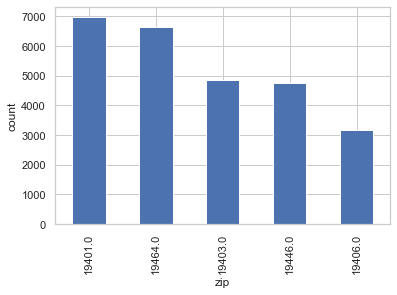

In [274]:
x.plot.bar(x=x.index,y=x)
plt.xlabel('zip')
plt.ylabel('count')

## Top 5 townships (twp) for 911 calls

In [278]:
x=df['twp'].value_counts().head(5) 

Text(0, 0.5, 'Count')

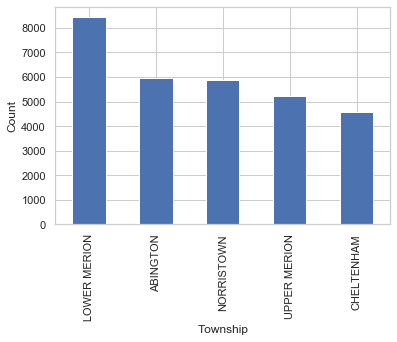

In [279]:
x.plot.bar(x=x.index,y=x)
plt.xlabel('Township')
plt.ylabel('Count')

## Unique title codes

In [282]:
df['title'].nunique()

110

## Creating new features (Reason From Title)

In [283]:
df['Reason']=df['title'].apply(lambda x:x.split(':')[0])

In [288]:
x=df['Reason'].value_counts()
x

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

## Countplot of 911 calls by Reason

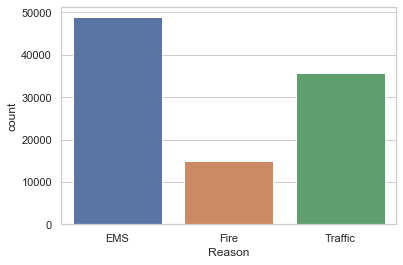

In [289]:
import seaborn as sns 
sns.countplot(x='Reason',data=df)

## Converting timeStamp column type to Datetime 

In [290]:
type(df['timeStamp'][0])

str

In [291]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [292]:
df['timeStamp'][0].hour

17

In [293]:
df['timeStamp'][0].month

12

In [294]:
df['timeStamp'][0].day

10

In [295]:
df['timeStamp'][0].dayofweek

3

In [296]:
df['hour']=df['timeStamp'].apply(lambda x:x.hour)
df['month']=df['timeStamp'].apply(lambda x:x.month)
df['day']=df['timeStamp'].apply(lambda x:x.dayofweek)

In [297]:
df['day'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [298]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day']=df['day'].map(dmap)

In [299]:
df['day']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: day, Length: 99492, dtype: object

## Countplot of the Day of Week column with the hue based off of the Reason column

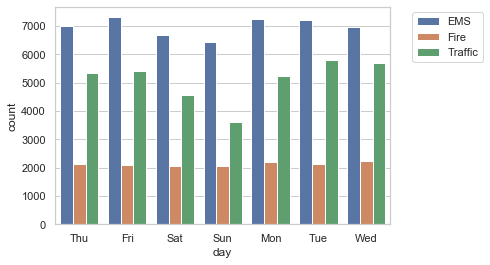

In [301]:
sns.set_style('whitegrid')
a=sns.countplot(x='day',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1))

## Same for Month

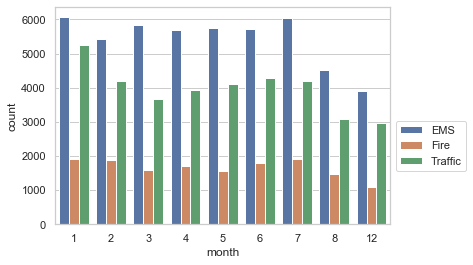

In [302]:
sns.countplot(x='month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1,0.5))

## Count of data according to month

In [305]:
x=df.groupby('month').count()

In [306]:
x

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,day
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [307]:
x.shape

(9, 12)

## Simple plot off of the dataframe indicating the count of calls per month

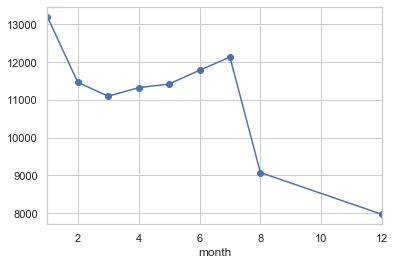

In [310]:
x['lat'].plot.line(style="-o")

In [311]:
x.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'hour', 'day'],
      dtype='object')

In [312]:
x.reset_index(inplace=True)

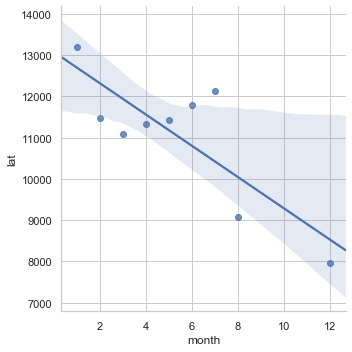

In [313]:

sns.lmplot(x='month',y='lat',data=x)

## Creating a new column called 'Date' that contains the date from the timeStamp column 

In [314]:
df['date']=df['timeStamp'].apply(lambda x:x.date())

In [315]:
df.head()['date'][0]

datetime.date(2015, 12, 10)

##  Groupby this Date column with the count() aggregate and create a plot of counts of 911 calls

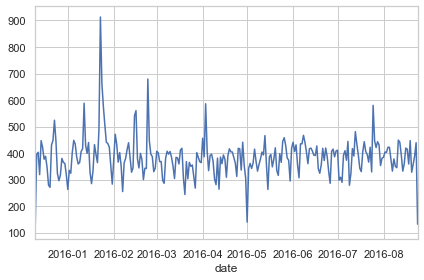

In [316]:
df.groupby('date').count()['lat'].plot.line()
plt.tight_layout()

## Recreating this plot but create 3 separate plots with each plot representing a Reason for the 911 call

In [317]:
val=df['Reason'].unique()

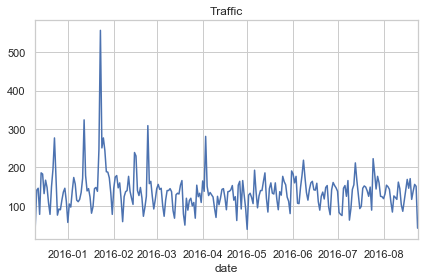

In [318]:
df[df['Reason']==val[len(val)-1]].groupby('date').count()['lat'].plot.line()
plt.title(val[len(val)-1])
plt.tight_layout()

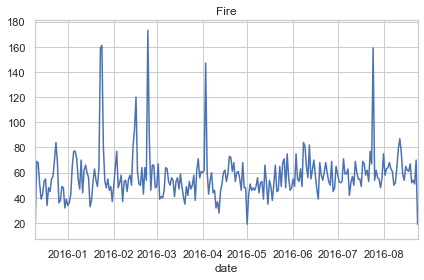

In [319]:
df[df['Reason']==val[len(val)-2]].groupby('date').count()['lat'].plot.line()
plt.title(val[len(val)-2])
plt.tight_layout()

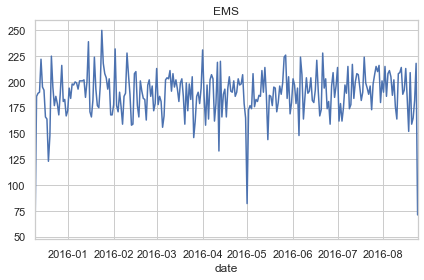

In [320]:
df[df['Reason']==val[len(val)-3]].groupby('date').count()['lat'].plot.line()
plt.title(val[len(val)-3])
plt.tight_layout()

## Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week

In [321]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [322]:
df.groupby(by=['day','hour']).count()['Reason'].unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Now create a HeatMap using this new DataFrame. **

In [323]:
dayHour.index

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object', name='day')

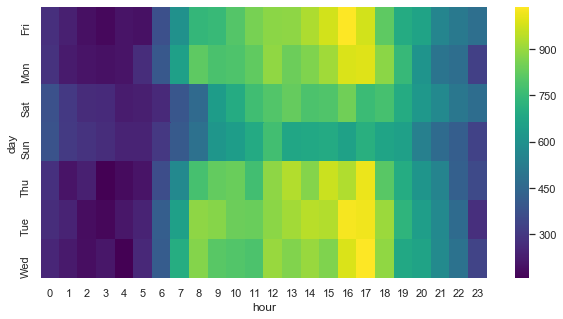

In [324]:
plt.figure(figsize=(10,5))
sns.heatmap(dayHour,cmap='viridis')

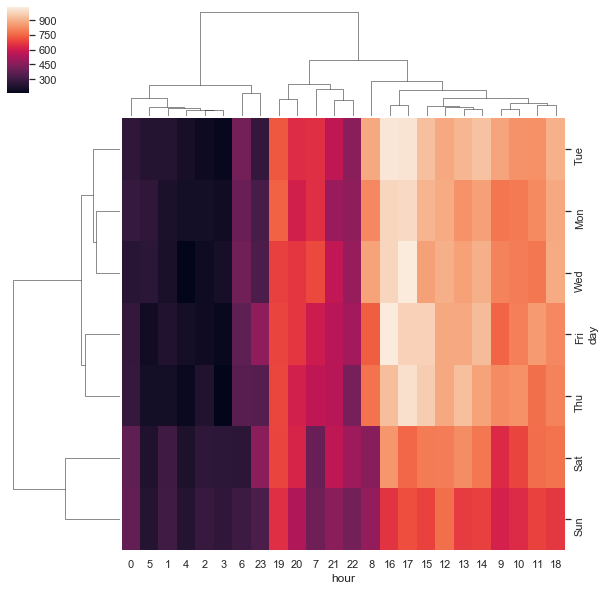

In [252]:
sns.clustermap(dayHour)

## Repeating these same plots and operations, for a DataFrame that shows the Month as the column

In [325]:
dm=df.groupby(by=['day','month']).count()['Reason'].unstack()

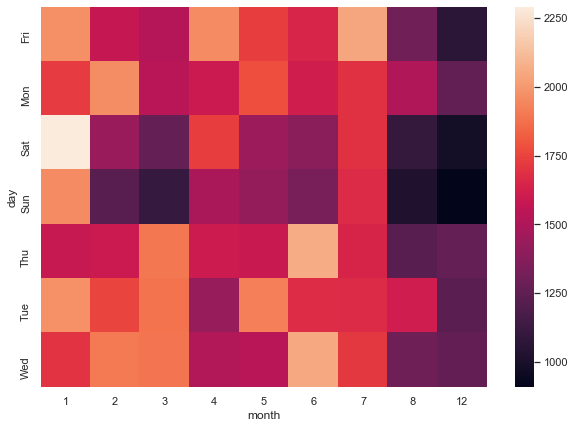

In [326]:
plt.figure(figsize=(10,7))
sns.heatmap(dm)

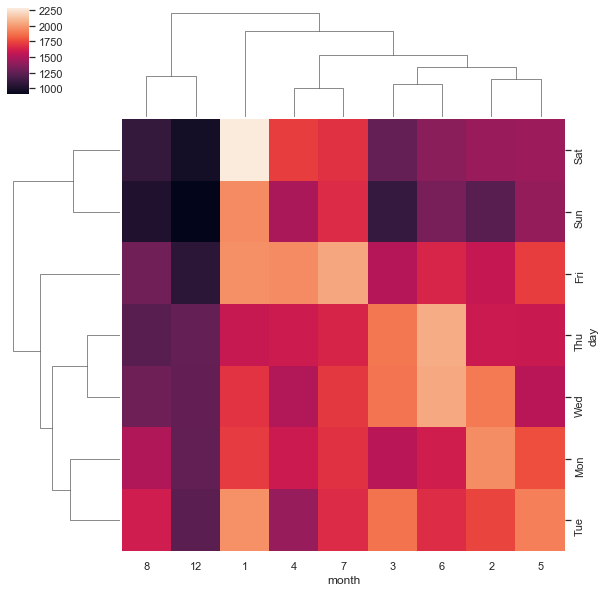

In [327]:
sns.clustermap(dm)